This notebook demonstrates the following for linear classification:

- Binary Classification

    - Classification with Hard threshold function 
        
        - MSE loss (aka Widrow-Hoff loss)

        
    - Classification with logistic (soft threshold) Function
        
        - Logistic function 

        - Derivation of the decision surface from logistic functions

        - Binary Cross_Entropy Loss

        - Why not naive MSE as loss for logistic function?

- Multiclass Classification

    - Softmax Function

    - Multiclass Cross-Entropy Loss

- Equivalence between minimizing cross-entropy loss and ML estimation

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Binary Classification

## Linear Classification with Hard Threshold Function

We focus on binary classification. The objective is to classify whether the input belongs to class 0 or class 1.

### Hard Threshold Function:

$ 
h_w(x) = 
\begin{cases} 
1, & \text{if } w^T x > 0 \\ 
0, & \text{otherwise} 
\end{cases} 
$



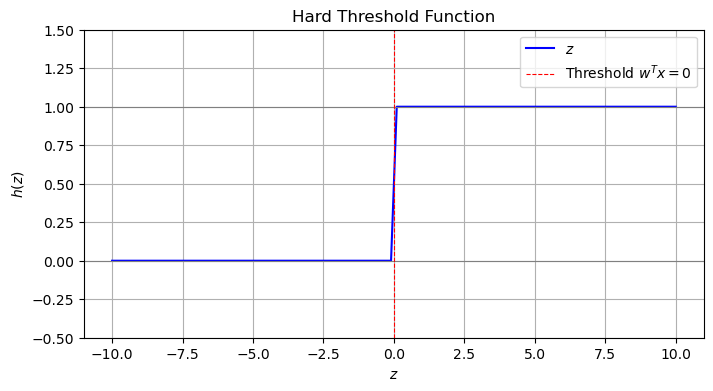

In [15]:
# hard threshold function
def hard_threshold(z):
    return np.where(z > 0, 1, 0)

z = np.linspace(-10, 10, 100)


# Compute the output of the hard threshold function
y_hat = hard_threshold(z)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(z, y_hat, label=r'$z$', color='blue')
plt.axhline(0, color='gray', linewidth=0.8)
plt.axhline(1, color='gray', linewidth=0.8)
plt.axvline(0, color='red', linestyle='--', linewidth=0.8, label='Threshold $w^T x = 0$')
plt.title('Hard Threshold Function')
plt.xlabel(r'$z$')
plt.ylabel(r'$h(z)$')
plt.ylim(-0.5, 1.5)
plt.legend()
plt.grid(True)
plt.show()

### MSE (Widrow-Hoff) Loss function for Hard Threshold:

Inspired by linear regression. We can call it as least squares classification.

It minimizes the mean square error between $\mathbf{w}^T \mathbf{x}$ and the label $y$, i.e., 

$ 
\text{Widrow-Hoff-Loss} = \frac{1}{2m} \sum_{i = 1}^{m} (\mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)})^2 
$

Let $z^{(i)} = \mathbf{w}^T \mathbf{x}^{(i)}$.

Also, assume that $y^{(i)} = 1$, i.e., data sample $x^{(i)}$ belongs to a positive class.

We plot the Widrow-Hoff Loss function for different values of $z^{(i)} = \mathbf{w}^T \mathbf{x}^{(i)}$.

- If $z^{(i)} > 0$, the loss should be zero as the classifier output matches the actual label.
- If $z^{(i)} < 0$, the loss should be non-zero as the classifier outputs 0 while the expected output is 1. The loss should increase as the value of $z^{(i)} \to -\infty$.

However, the code below demonstrates that Widrow-Hoff loss function does not meet this expectation.

Therefore, linear least squares classification cannot be used.

**Question:**  How to overcome this issue?

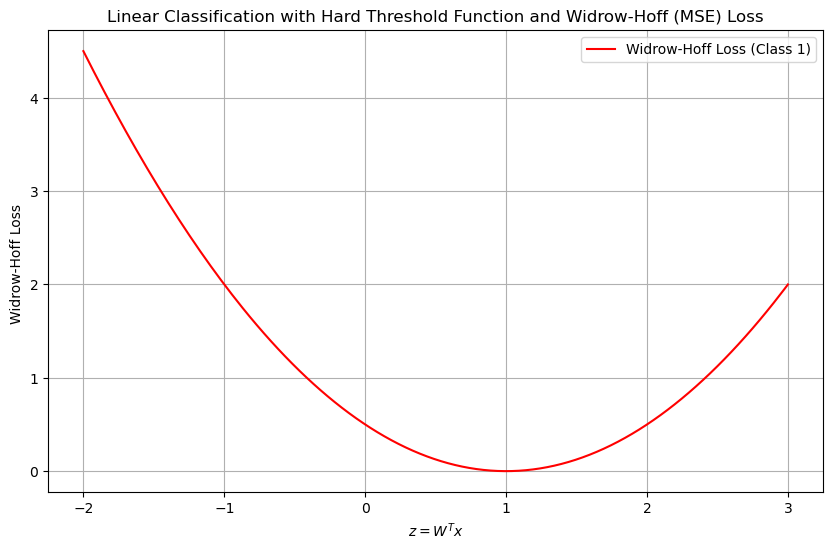

In [16]:
def widrow_hoff_loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2) / 2

# Generate a range of values for z = W^Tx
z = np.linspace(-2, 3, 200)
y_true = np.where(z > 0, 1, 0)  # Assuming a binary classification problem
y_true = np.ones(len(z))

widrow_hoff_loss = [widrow_hoff_loss_function(y_true, val) for val in z]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(z, widrow_hoff_loss, label='Widrow-Hoff Loss (Class 1)', linestyle='-', color = 'red')
plt.title('Linear Classification with Hard Threshold Function and Widrow-Hoff (MSE) Loss')
plt.xlabel(r'$z = W^Tx$')
plt.ylabel('Widrow-Hoff Loss ')
plt.legend()
plt.grid(True)
plt.show()

## Linear Classification with Logistic (Soft Threshold) Function  

In binary logistic regression, the model outputs a single value that represents the probability of the input feature vector belonging to class 1. We can call this probability as soft value.

### Logistic (Sigmoid) Function

For an input feature vector $ \mathbf{x}^{(i)} $, the model produces a score $ z^{(i)} $:

$$ z^{(i)} = \mathbf{w}^T \mathbf{x}^{(i)}$$

where:
- $ z^{(i)} $ is the score  for the $i$-th data instance $\mathbf{x}^{(i)}$
- $ \mathbf{w} $ is the weight vector with $w_0$ indicating the bias term


To convert the score $ z $ into a probability, the logistic (sigmoid) function is applied. The sigmoid function ensures that the output value is between 0 and 1, representing a valid probability.

The sigmoid function is defined as follows:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

### Output Probability

The output probability distribution of logistic regression is 

$$\mathbf{Q} = \begin{bmatrix} P(\hat{y}^{(i)} = 1|\mathbf{x}^{(i)}) \\ P(\hat{y}^{(i)}=0|\mathbf{x}^{(i)})\end{bmatrix} = \begin{bmatrix} \sigma(z^{(i)}) \\ 1-\sigma(z^{(i)})\end{bmatrix}$$

In [17]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

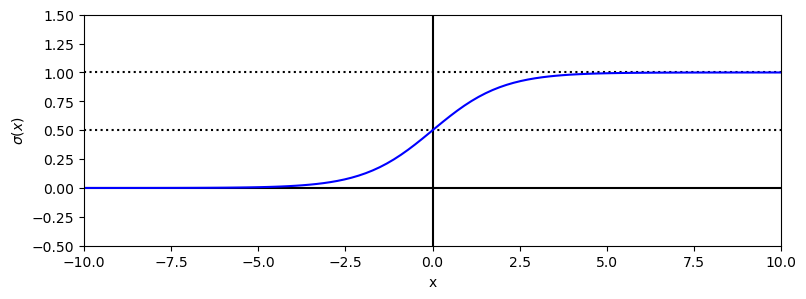

In [18]:
x = np.linspace(-10, 10, 100)
y = logistic_function(x)
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-2, 2], "k-")
plt.plot(x, y, "b-", label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel("x")
plt.ylabel(r"$\sigma(x)$")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis([-10, 10, -0.5, 1.5])
plt.show()

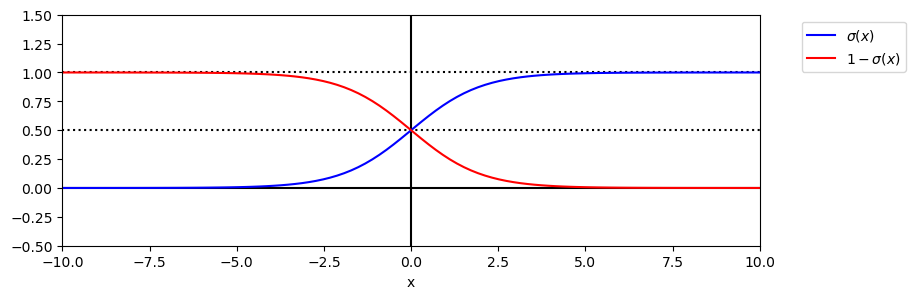

In [19]:
x = np.linspace(-10, 10, 100)
y = logistic_function(x)
z = 1-y

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-2, 1.5], "k-")
plt.plot(x, y, "b-", label=r"$\sigma(x)$")
plt.plot(x, z, "r-", label=r"$1-\sigma(x)$")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis([-10, 10, -0.5, 1.5])
plt.show()

### Decision Boundary from Logistic Function

The logistic function is given by:

$
\sigma(z) = \frac{1}{1 + e^{-z}}
$

where $ z^{(i)} =  \mathbf{w}^T  \mathbf{x}^{(i)} $.

$$P(y^{(i)}=1 | \mathbf{x}^{(i)}) = \sigma(\mathbf{w}^T  \mathbf{x}^{(i)})$$

$$P(y^{(i)}=0 | \mathbf{x}^{(i)}) = 1 - \sigma( \mathbf{w}^T  \mathbf{x}^{(i)})$$

For a binary classification, we want to compare the probability of the positive class to the negative class:

If $P(y^{(i)}=1 | \mathbf{x}^{(i)}) \geq P(y^{(i)}= 0 | \mathbf{x}^{(i)})$,  then $\hat{y}^{(i)}=1$

else: $\hat{y}^{(i)}=0$

$$ \implies \frac{1}{1 + e^{-\mathbf{w}^T  \mathbf{x}^{(i)}}} \geq 1 - \frac{1}{1 + e^{-\mathbf{w}^T  \mathbf{x}^{(i)}}} $$

$$ \implies  \frac{1}{1 + e^{-\mathbf{w}^T  \mathbf{x}^{(i)}}} \geq  \frac{e^{-\mathbf{w}^T  \mathbf{x}^{(i)}}}{1 + e^{-\mathbf{w}^T  \mathbf{x}^{(i)}}} $$

$$ \implies  1 \geq  e^{-\mathbf{w}^T  \mathbf{x}^{(i)}} $$

Taking natural logarithm on both sides:

$$ \implies  0 \geq  -\mathbf{w}^T  \mathbf{x}^{(i)} $$

$$ \implies  \mathbf{w}^T  \mathbf{x}^{(i)} \geq  0 $$

Therefore, 

$$\left(P(y^{(i)}=1 | \mathbf{x}^{(i)}) \geq P(y^{(i)}= 0 | \mathbf{x}^{(i)})\right) \Leftrightarrow \left(\mathbf{w}^T  \mathbf{x}^{(i)} \geq  0\right) $$


The decision boundary is given by:

$$ \mathbf{w}^T  \mathbf{x}^{(i)} = 0 $$

This equation represents a hyperplane that separates the data into two classes.

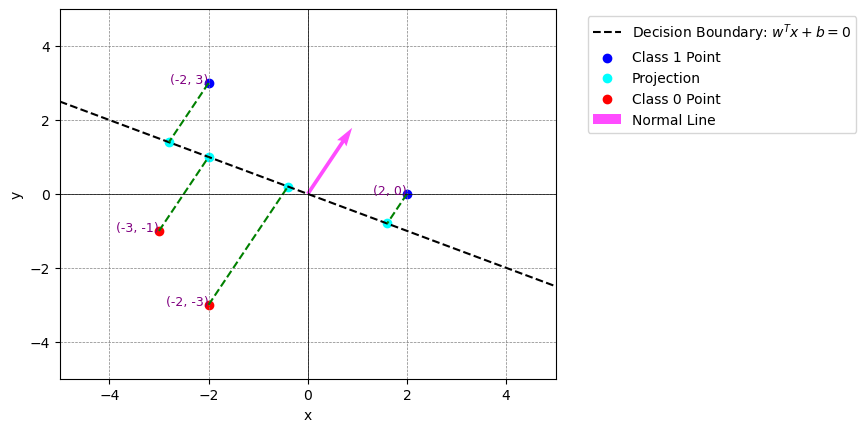

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the weights and bias for the decision boundary
#We assume W_0 = b and aufgment data with scalar '1'; we don't show bias term explicitly in logistic regression
w = np.array([1, 2])
b = 0  # Bias term

# Normalize the weights for visualization
w = w / np.linalg.norm(w)

# Define the decision boundary with bias
def decision_boundary(x):
    return (w[0] * x + b) / -w[1]

# Sample data points for two classes
class_1 = np.array([ [2, 0],[-2, 3]])  # Positive class
class_0 = np.array([[-3, -1], [-2, -3]])  # Negative class

# Function to compute distance from the decision boundary
def distance_from_boundary(v, w):
    return np.dot(v, w) + b

# Function to project a point onto the decision boundary
def project_onto_boundary(v, w):
    return v - ((distance_from_boundary(v, w)) / np.dot(w, w)) * w

# Plot the decision boundary
x_vals = np.linspace(-5, 5, 100)
y_vals = decision_boundary(x_vals)
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary: $w^T x + b = 0$')

# Plot data points, their projections, and distances
for v in class_1:
    proj = project_onto_boundary(v, w)
    plt.scatter(v[0], v[1], color='blue', label='Class 1 Point' if 'Class 1 Point' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.scatter(proj[0], proj[1], color='cyan', label='Projection' if 'Projection' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.plot([v[0], proj[0]], [v[1], proj[1]], 'g--')
    plt.text(v[0], v[1], f'({v[0]}, {v[1]})', fontsize=9, color='purple', ha='right')

for v in class_0:
    proj = project_onto_boundary(v, w)
    plt.scatter(v[0], v[1], color='red', label='Class 0 Point' if 'Class 0 Point' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.scatter(proj[0], proj[1], color='cyan')
    plt.plot([v[0], proj[0]], [v[1], proj[1]], 'g--')
    plt.text(v[0], v[1], f'({v[0]}, {v[1]})', fontsize=9, color='purple', ha='right')

# Plot reference normal line
mid_point = np.array([0, decision_boundary(0)])
normal_vector = w * 2  # Scale for visibility
plt.quiver(mid_point[0], mid_point[1], normal_vector[0], normal_vector[1], angles='xy', scale_units='xy', scale=1, color='magenta', label='Normal Line', alpha=0.7)

# Set plot limits and labels
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Why not MSE loss for Logistic Function?

The MSE loss function for a logistic regression model can be expressed as:

$$
\text{Logistic-MSE} = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - \sigma(w^T x^{(i)}) \right)^2
$$

where:
- $ m $ is the number of training examples.
- $ y^{(i)} $ is the true label for the $ i $-th example.
- $ x^{(i)} $ is the feature vector for the $ i $-th example.
- $ w $ is the weight vector.
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ is the logistic (sigmoid) function.


Now, let us check whether Logistic-MSE loss satisfies the following conditions:

Assuming that the expected output is a positive class (Class 1)

- If $z^{(i)} > 0$, the loss should be zero as the classifier output matches the actual label.
- If $z^{(i)} < 0$, the loss should be non-zero as the classifier outputs 0 while the expected output is 1. The loss should increase as the value of $z^{(i)} \to -\infty$.

From the figure below, the Logistic-MSE satisfies these two  conditions, i.e., loss is approaching zero for $z^{i} > 0$ and increases for $z^{i} < 0$.

**Question** Why is MSE not used for Logistic Regression?

The loss function is not convex!!

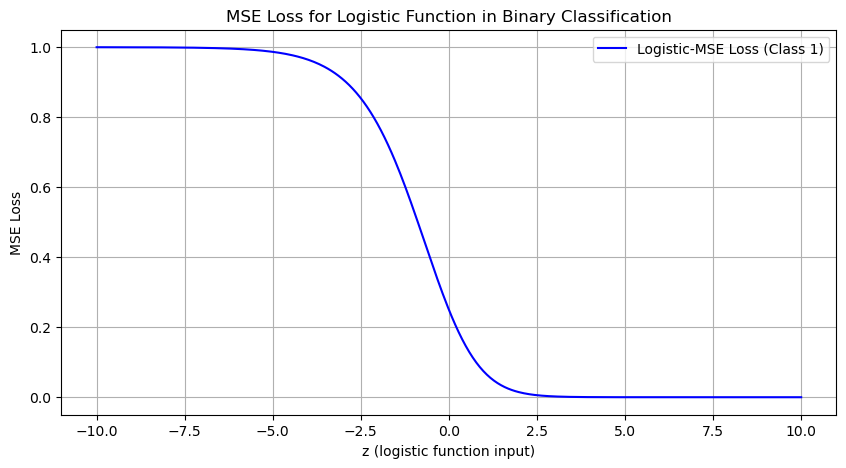

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z (representing the argument to the logistic function)
z_values = np.linspace(-10, 10, 400)

# Compute logistic function outputs
logistic_values = logistic(z_values)

# Assume binary true labels (y_true)
y_true_1 = np.ones_like(logistic_values)   # Class 1

# Compute the MSE loss for each z value
mse_class_1 = (y_true_1 - logistic_values) ** 2

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(z_values, mse_class_1, label='Logistic-MSE Loss (Class 1)', color='blue')
plt.title('MSE Loss for Logistic Function in Binary Classification')
plt.xlabel('z (logistic function input)')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

### Cross-Entropy 

Cross-Entropy is a metric often used in machine learning to measure the difference between two probability distributions. It quantifies how well one probability distribution approximates another. In the context of machine learning, it is typically used to compare the predicted probability distribution of a model to the true distribution of the labels. The cross-entropy provides a measure of how well the predicted probabilities match the actual outcomes. By minimizing Cross-Entropy, we can train models to make more accurate predictions.

The Cross-Entropy between two probability distributions $ \mathbf{P} $ and $ \mathbf{Q} $ is defined as:

$$ H(\mathbf{P}, \mathbf{Q}) = - \sum_{x \in dom(X)} \mathbf{P}(X=x) \log(\mathbf{Q}(X=x)) $$

where:
- $ \mathbf{P} $ is the true probability distribution (ground truth).
- $ \mathbf{Q} $ is the predicted probability distribution.
- The summation is over all possible outcomes $ x $.

**True Distribution ($ \mathbf{P} $)**: Represents the actual distribution of the outcomes. For example, in a binary classification problem, it is the distribution of the true (label y = 1) class labels. 
  
**Predicted Distribution ($ \mathbf{Q} $)**: Represents the distribution of the outcomes predicted by the model. For example, in a binary classification problem, it is the distribution of the predicted probabilities for the class labels.

**Logarithmic Term ($ \log(\mathbf{Q}(x)) $)**: This term penalizes predictions that are far from the true distribution. A higher penalty is applied to predictions with lower probabilities for the actual class.

**Example**


Consider a binary classification problem where the true class is 1. Here are two scenarios:


1. **High Predicted Probability for the Actual Class:**

   - Predicted probability $ \mathbf{Q}(X=1) = 0.9 $

   - Logarithmic term $ \log(\mathbf{Q}(X=1)) = \log(0.9) \approx -0.105 $

   - The penalty is low because the prediction is close to the true class.


2. **Low Predicted Probability for the Actual Class:**

   - Predicted probability $ \mathbf{Q}(X=1) = 0.1 $

   - Logarithmic term $ \log(\mathbf{Q}(X=1)) = \log(0.1) \approx -2.302 $

   - The penalty is high because the prediction is far from the true class.


### Average Binary Cross-Entropy (BCE) Loss

The true distribution for $i$-th data sample $ \mathbf{P} = \begin{bmatrix} y^{(i)} \\ (1-y^{(i)}) \end{bmatrix}$.

The predicted distribution for $i$-th data sample $ \mathbf{Q} = \begin{bmatrix} \hat{y}^{(i)} \\ (1-\hat{y}^{(i)}) \end{bmatrix}$.

The cross-entropy for binary classification is called Binary Cross-Entropy (BCE) Loss. The average BCE loss can be written as:

$$ L(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $$

where:
- $ m $ is the number of examples.
- $ y^{(i)} $ is the true label for example $ i $ (either 0 or 1).
    - $y^{(i)} = 1$ implies $\mathbf{P} = \begin{bmatrix} P(y^{(i)} = 1) \\ P(y^{(i)} = 0)  \end{bmatrix} = \begin{bmatrix} 1\\ 0 \end{bmatrix}$        
    - $y^{(i)} = 0$ implies $\mathbf{P} = \begin{bmatrix} P(y^{(i)} = 1)\\ P(y^{(i)} = 0)  \end{bmatrix} = \begin{bmatrix} 0\\ 1 \end{bmatrix}$
- $ \hat{y}^{(i)} $ is the predicted probability that example $ i $ is of class 1.
    - $ \hat{y}^{(i)}$  is the probability that  $ i $-th  instance belongs to class 1. Hence $\mathbf{Q} = \begin{bmatrix} \hat{y}^{(i)}\\ 1-\hat{y}^{(i)} \end{bmatrix} = \begin{bmatrix} \sigma(\mathbf{w}^T \mathbf{x}^{(i)})\\ 1-\sigma(\mathbf{w}^T \mathbf{x}^{(i)}) \end{bmatrix}$

#### Average BCE Loss: Intuition

- If the predicted distribution $ Q $ is exactly the same as the true distribution $ P $, the Cross-Entropy loss will be minimized.
- If the predicted probabilities are far from the actual probabilities, the Cross-Entropy loss will be high, indicating a large difference between the two distributions.        

In [22]:
def binary_cross_entropy_loss(y_true, y_pred):
    m = len(y_true)
    return -(1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

### Plot of binary cross-entropy loss

Assume the ground truth is $\begin{bmatrix}1 \\ 0 \end{bmatrix}$

Simulate the predicted probabilities as $\begin{bmatrix} p \\ (1-p) \end{bmatrix}$

When $p=0$, the simulated predicted probabilities are: $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$, the cross-entropy loss would be maximum

When $p=1$, the simulated predicted probabilities are: $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$, i.e., it matches with ground truth and the cross-entropy loss would be zero

[4.605170185988091, 3.917086307384694, 3.513314679782861, 3.2264804242534204, 3.0038459083281603, 2.8218638524710946, 2.6679557439003325, 2.534606318340273, 2.416964835518722, 2.311717576557318, 2.216500070864547, 2.129565928862405, 2.049588578530155, 1.97553663035471, 1.9065923155212436, 1.8420962833896488, 1.7815091533718872, 1.724384066755284, 1.6703466655210928, 1.619080209926335, 1.570314329094892, 1.523816389733525, 1.4793847841859027, 1.4368436473953188, 1.3960386525945687, 1.3568336317465661, 1.31910783389558, 1.2827536821790502, 1.2476749244716814, 1.2137850975686864, 1.1810062432058883, 1.1492678279320032, 1.1185058291876802, 1.0886619578149417, 1.0596829932642318, 1.0315202124474112, 1.004128896839779, 0.9774679053090214, 0.9514993024262686, 0.9261880338303496, 0.9015016416734801, 0.8774100143527765, 0.8538851656867255, 0.8309010394748382, 0.8084333360177416, 0.7864593577015971, 0.7649578711867642, 0.7439089841032013, 0.723294034457857, 0.703095491213134, 0.683296864709111, 

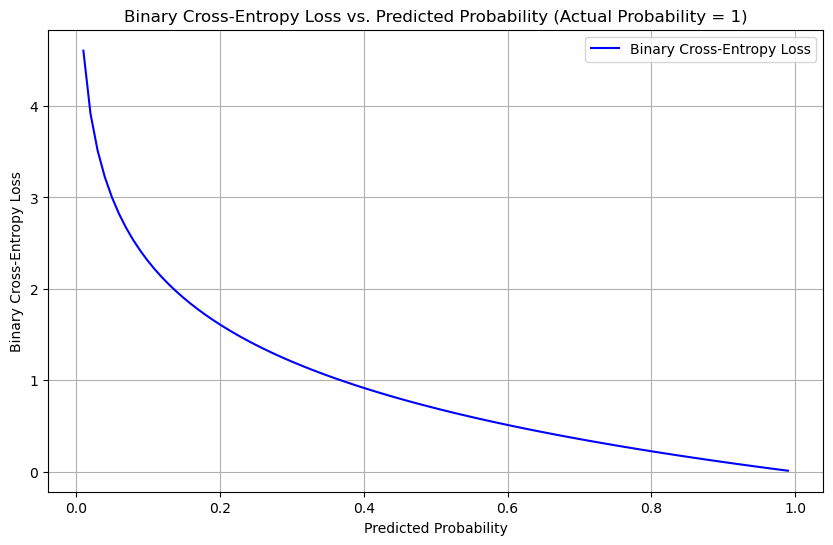

In [23]:
t = np.linspace(0.01,0.99,100)
y_true = np.array([1,0])
l_bce = []
for p in t:    
    y_pred = np.array([p, 1-p])
    l_bce.append(binary_cross_entropy_loss(y_true, y_pred))
print(l_bce)

# Plot the binary cross-entropy loss
plt.figure(figsize=(10, 6))
plt.plot(t, l_bce, label='Binary Cross-Entropy Loss', color='blue')
plt.xlabel('Predicted Probability')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Binary Cross-Entropy Loss vs. Predicted Probability (Actual Probability = 1)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Cross-Entropy Loss, Logistic-MSE Loss, Widrow-Hoff Loss

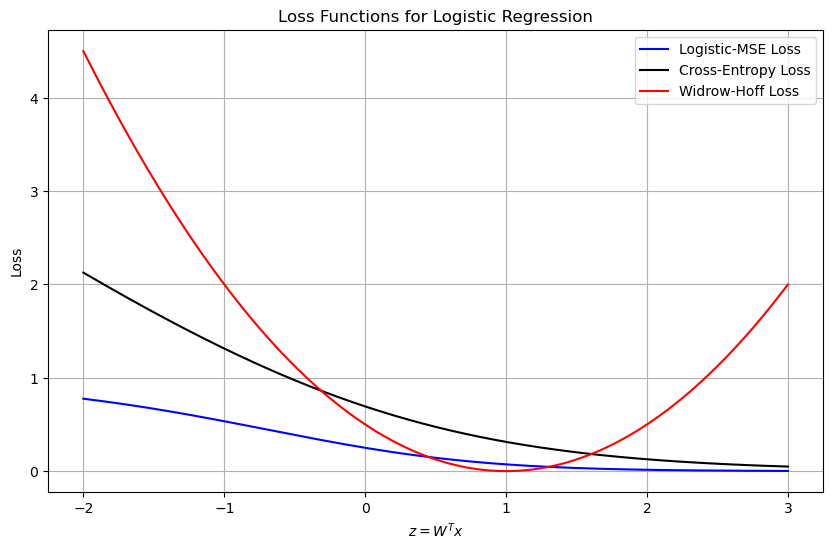

In [24]:
# Define the loss functions
def mse_loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def widrow_hoff_loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2) / 2

# Generate a range of values for z = W^Tx
z = np.linspace(-2, 3, 200)
y_true = np.where(z > 0, 1, 0)  # Assuming a binary classification problem
y_true = np.ones(len(z))
# Get predictions from logistic function
y_pred = logistic_function(z)

# Calculate losses
mse_loss = [mse_loss_function(y_true, logistic_function(val)) for val in z]
cross_entropy_loss = [binary_cross_entropy_loss(y_true, logistic_function(val)) for val in z]
widrow_hoff_loss = [widrow_hoff_loss_function(y_true, val) for val in z]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(z, mse_loss, label='Logistic-MSE Loss', linestyle='-', color = 'blue')
plt.plot(z, cross_entropy_loss, label='Cross-Entropy Loss', linestyle='-', color = 'black')
plt.plot(z, widrow_hoff_loss, label='Widrow-Hoff Loss', linestyle='-', color = 'red')
plt.title('Loss Functions for Logistic Regression')
plt.xlabel(r'$z = W^Tx$')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Multiclass Logistic Regression


For an input feature vector $ \mathbf{x}^{(i)} $, the model produces a score for each of the $ C $ classes. These scores are typically computed as follows:


$$ z^{(i)}_j = \mathbf{w}_j^T \mathbf{x}^{(i)}$$


where:

- $ z^{(i)}_j $ is the score for class $ j $ of $ i $ -th data instance

- $ \mathbf{w}_j $ is the weight vector for class $ j $ and $w_0$ corresponds to bias. 




The output of the multiclass logistic regressor is a vector $ \mathbf{z} $ of length $ C $, where each element $ z_j $ represents the score for class $ j $.


## Softmax Function


To convert these scores into a probability distribution, the softmax function is applied to the vector $ \mathbf{z} $. The softmax function ensures that the output values sum to 1, forming a valid probability distribution.


The softmax function is defined as follows:


$$\text{softmax}\left(\begin{bmatrix} z^{(i)}_1 \\ z^{(i)}_2 \\ \vdots \\ z^{(i)}_C \end{bmatrix}\right)=\begin{bmatrix} \frac{e^{z^{(i)}_1}}{\sum_{k=1}^{C} e^{z^{(i)}_k}} \\ \frac{e^{z^{(i)}_2}}{\sum_{k=1}^{C} e^{z^{(i)}_k}} \\ \vdots \\ \frac{e^{z^{(i)}_C}}{\sum_{k=1}^{C} e^{z^{(i)}_k}} \end{bmatrix}$$



where:

- $  z^{(i)}_j $ is the score for class $ j $

- $ C $ is the number of classes


By applying the softmax function, the scores $ \mathbf{z}^{(i)} $ are converted into probabilities $ \mathbf{p} $, where each $ p_j $ represents the probability that the input feature vector belongs to class $ j $.

## Output Probability Distribution


After applying the softmax function, the output vector $ \mathbf{Q} $ (representing the probability distribution) is given by:


$$ \mathbf{Q} = \begin{bmatrix} P(\hat{y}^{(i)}=1) \\ P(\hat{y}^{(i)}=2) \\ \vdots \\ P(\hat{y}^{(i)}=C) \end{bmatrix}= \begin{bmatrix} \hat{y}^{(i)}_1 \\ \hat{y}^{(i)}_2 \\ \vdots \\ \hat{y}^{(i)}_C \end{bmatrix}  = \text{softmax}\left(\begin{bmatrix} z^{(i)}_1 \\ z^{(i)}_2 \\ \vdots \\ z^{(i)}_C \end{bmatrix}\right)=\begin{bmatrix} \frac{e^{z^{(i)}_1}}{\sum_{k=1}^{C} e^{z^{(i)}_k}} \\ \frac{e^{z^{(i)}_2}}{\sum_{k=1}^{C} e^{z^{(i)}_k}} \\ \vdots \\ \frac{e^{z^{(i)}_C}}{\sum_{k=1}^{C} e^{z^{(i)}_k}} \end{bmatrix}$$



Where each element $ \text{softmax}(z_j) $ is the probability that the input feature vector belongs to class $ j $.


$$\text{softmax}\left(\begin{bmatrix} z^{(i)}_1 \\ z^{(i)}_2 \\ \vdots \\ z^{(i)}_C \end{bmatrix}\right)=\begin{bmatrix} \frac{e^{z^{(i)}_1}}{\sum_{k=1}^{C} e^{z^{(i)}_k}} \\ \frac{e^{z^{(i)}_2}}{\sum_{k=1}^{C} e^{z^{(i)}_k}} \\ \vdots \\ \frac{e^{z^{(i)}_C}}{\sum_{k=1}^{C} e^{z^{(i)}_k}} \end{bmatrix}$$


**Example:**

With $C=3$, the output of logistic regressor is:

$$ \mathbf{Q}= \begin{bmatrix} P(\hat{y}^{(i)}=1) \\ P(\hat{y}^{(i)}=2) \\ P(\hat{y}^{(i)}=3) \end{bmatrix} = \begin{bmatrix} \hat{y}^{(i)}_1 \\ \hat{y}^{(i)}_2 \\ \hat{y}^{(i)}_3 \end{bmatrix} =  \text{softmax}\left(\begin{bmatrix} z^{(i)}_1 \\ z^{(i)}_2  \\ z^{(i)}_3 \end{bmatrix}\right)=\begin{bmatrix} \frac{e^{z^{(i)}_1}}{\sum_{k=1}^{3} e^{z^{(i)}_k}} \\ \frac{e^{z^{(i)}_2}}{\sum_{k=1}^{3} e^{z^{(i)}_k}} \\ \frac{e^{z^{(i)}_3}}{\sum_{k=1}^{3} e^{z^{(i)}_k}} \end{bmatrix} $$


## Cross-Entropy Loss for Multiclass Logistic Regression
The average multiclass cross-entropy loss function is defined as:
$$ L(y, \hat{y}) = - \frac{1}{m}\sum_{i=1}^{m} \sum_{c=1}^{C} y^{(i)}_{c} \log(\hat{y}^{(i)}_{c}) $$

where:
- $ m $ is the number of data instances.
- $ C $ is the number of classes.
- $ y^{(i)}_{c} $ is a binary indicator (0 or 1) of whether the class label $ c $ is the correct classification for example $ i $. 
- $ \hat{y}^{(i)}_{c} $ is the predicted probability that example $ i $ is of class $ c $.

In [25]:
def softmax(z):
    # Subtract the maximum value from the input array for numerical stability
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z, axis=0)

z = np.array([0.5, 0.7, 0.6])
    
# Applying the softmax function
Q = softmax(z)
  
# Output the probability distribution
print(f"Softmax probabilities Q = {Q}")
print(sum(Q))


Softmax probabilities Q = [0.30060961 0.3671654  0.33222499]
1.0


### Plot of multiclass cross-entropy loss

Assume the ground truth is $\begin{bmatrix}1 \\ 0 \\ 0 \end{bmatrix}$

Simulate the predicted probabilities as $\begin{bmatrix} p \\ \frac{1-p}{2} \\ \frac{1-p}{2} \end{bmatrix}$

When $p=0$, the simulated predicted probabilities are: $\begin{bmatrix} 0 \\ 0.5 \\ 0.5 \end{bmatrix}$, the cross-entropy loss would be maximum

When $p=1$, the simulated predicted probabilities are: $\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, i.e., it matches with ground truth and the cross-entropy loss would be zero





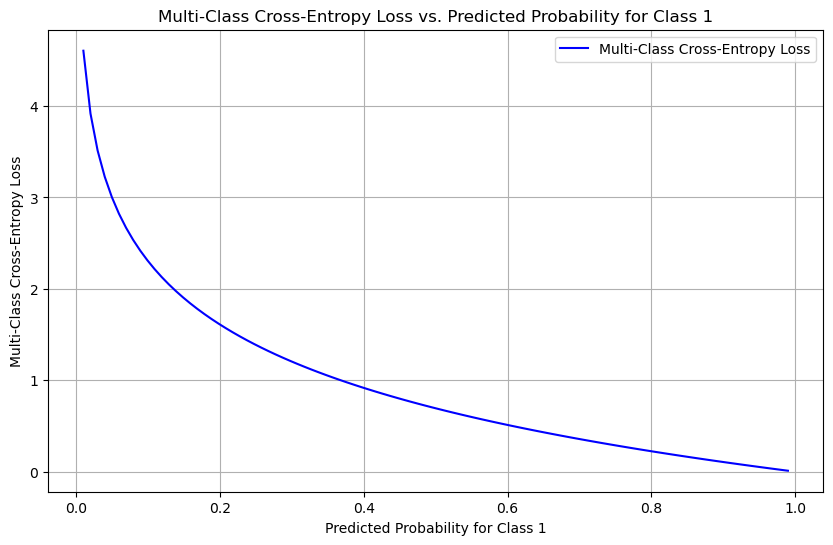

In [26]:
# Define the multi-class cross-entropy loss function
def multiclass_cross_entropy_loss(y_true, y_pred):
    m = len(y_true)
    # Ensure probabilities are clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    # '*' indicates element-wise multiplication of vectors
    loss = -(1 / m) * np.sum(y_true * np.log(y_pred))
    return loss

# Create a range of predicted probabilities for class 1; generates 100 samples 
t = np.linspace(0.01, 0.99, 100)

# True labels for a simple 3-class problem
y_true = np.array([[1, 0, 0]])

# Calculate the multi-class cross-entropy loss for each set of predicted probabilities
l_mce = []
for p in t:
    # Create predicted probabilities for a 3-class problem
    y_pred = np.array([[p, (1 - p) / 2, (1 - p) / 2]])
    l_mce.append(multiclass_cross_entropy_loss(y_true, y_pred))

# Plot the multi-class cross-entropy loss
plt.figure(figsize=(10, 6))
plt.plot(t, l_mce, label='Multi-Class Cross-Entropy Loss', color='blue')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Multi-Class Cross-Entropy Loss')
plt.title('Multi-Class Cross-Entropy Loss vs. Predicted Probability for Class 1')
plt.legend()
plt.grid(True)
plt.show()

# Prove that minimizing cross-entropy loss is same as maxizimizing the likelihood of data for the given feature vector

 **Proof:** Minimizing Cross-Entropy Loss is Equivalent to Maximizing Likelihood of Data

In logistic regression, we aim to model the probability of the target variable $ y $ given the input features $ \mathbf{x} $. Let's denote the model's predicted probability as $ \hat{y} = P(y=1|\mathbf{x}) $.

## Likelihood of the Data


Given a dataset $ \mathcal{D} = [(\mathbf{x}^{(1)}, y^{(1)}), \ldots, (\mathbf{x}^{(m)}, y^{(m)})] $, the likelihood of the data is the probability of observing the given data under the model's assumptions. The likelihood function $ L $ is given by:

$$ L(\mathbf{w}) = P(\mathcal{D}; \mathbf{w}) = \prod_{i=1}^{m} P(y^{(i)}|\mathbf{x}^{(i)}; \mathbf{w}) $$

In logistic regression, we model $ P(y^{(i)}=1|\mathbf{x}^{(i)}) $ as $ \hat{y}^{(i)} = \sigma(\mathbf{w}^T \mathbf{x}^{(i)} ) $, where $ \sigma(z) $ is the sigmoid function. Therefore, we have:

$$ P(y^{(i)}|\mathbf{x}^{(i)}; \mathbf{w}) = (\hat{y}^{(i)})^{y^{(i)}} (1 - \hat{y}^{(i)})^{1 - y^{(i)}} $$

The likelihood function can be written as:

$$ L(\mathbf{w}) = \prod_{i=1}^{m} (\hat{y}^{(i)})^{y^{(i)}} (1 - \hat{y}^{(i)})^{1 - y^{(i)}} $$

## Log-Likelihood

To simplify the calculations, we take the natural logarithm of the likelihood function, resulting in the log-likelihood function $ \ell $:

$$ \ell(\mathbf{w}) = \log L(\mathbf{w}) = \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $$

## Cross-Entropy Loss

The cross-entropy loss function $ J $ for logistic regression is given by:

$$  J(\mathbf{w}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $$

## Relationship Between Log-Likelihood and Cross-Entropy Loss

Notice that the cross-entropy loss function is simply the negative log-likelihood function scaled by a factor of $\frac{1}{m}$:

$$ J(\mathbf{w}) = -\frac{1}{m} \ell(\mathbf{w}) $$

## Minimizing Cross-Entropy Loss

Minimizing the cross-entropy loss $ J(\mathbf{w}) $ is equivalent to minimizing the negative log-likelihood:

$$ \min_{\mathbf{w}} J(\mathbf{w}) \Leftrightarrow \min_{\mathbf{w}} \left(-\frac{1}{m} \ell(\mathbf{w})\right) $$

Since $\frac{1}{m}$ is a positive constant, it does not affect the optimization:

$$ \min_{\mathbf{w}} J(\mathbf{w}) \Leftrightarrow \min_{\mathbf{w}} \left(-\ell(\mathbf{w})\right) $$

Minimizing $-\ell(\mathbf{w})$ is the same as maximizing $\ell(\mathbf{w})$:

$$ \min_{\mathbf{w}} J(\mathbf{w}) \Leftrightarrow \max_{\mathbf{w}} \ell(\mathbf{w}) $$



# Gradient Descent for Logistic Regression

The hypothesis $ h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)}) $ is given by the sigmoid function:

$$ 
h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)}) = \frac{1}{1 + e^{-\boldsymbol{w}^T \boldsymbol{x}^{(i)}}} 
$$

The cost function $ J(\boldsymbol{w}) $ for logistic regression is:

$$ 
J(\boldsymbol{w}) = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})) \right) 
$$

The gradient of the cost function with respect to $\boldsymbol{w}$ is:


$$

   \frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} = -\frac{1}{m} \sum_{i=1}^{m} \frac{\partial}{\partial \boldsymbol{w}} \left[ y^{(i)} \log(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})) \right]

$$


The derivative of first and second terms in summation on the right hand side (RHS) are:
   $$
     \frac{\partial}{\partial \boldsymbol{w}} y^{(i)} \log(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})) = y^{(i)} \frac{1}{h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})} \frac{\partial h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})}{\partial \boldsymbol{w}}
   $$


   $$
     \frac{\partial}{\partial \boldsymbol{w}} (1 - y^{(i)}) \log(1 - h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})) = (1 - y^{(i)}) \frac{-1}{1 - h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})} \frac{\partial h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})}{\partial \boldsymbol{w}}
   $$


   The derivative of the hypothesis $ h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)}) = \sigma(\boldsymbol{w}^T \boldsymbol{x}^{(i)}) $ with respect to $\boldsymbol{w}$ is:

  $$
   \frac{\partial h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})}{\partial \boldsymbol{w}} = h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)}) (1 - h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})) \boldsymbol{x}^{(i)}
  $$

Combining the above:
  $$
   \frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \frac{\boldsymbol{x}^{(i)}}{h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})} - (1 - y^{(i)}) \frac{\boldsymbol{x}^{(i)}}{1 - h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})} \right) h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)}) (1 - h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)}))
  $$

It can be simplified as:
$$
  \frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)}) - y^{(i)} \right) \boldsymbol{x}^{(i)}
$$


Subsequently, the gradient descent update rule for logistic regression in a non-vectorized form for each feature $ n $ is:

$$ 
w_n := w_n - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)}) - y^{(i)} \right) x_n^{(i)} 
$$



## Vectorized Format for Gradient Descent

The matrix $\boldsymbol{X}$ is constructed as follows:

- Each row corresponds to a single training example.
- Each column corresponds to a feature of the training examples.
- $\boldsymbol{X}$ typically has dimensions $ m \times n $, where $ m $ is the number of training examples and $ n $ is the number of features.

 **Example**

Assuming we have $ m $ training examples and each example has $ n $ features, $\boldsymbol{X}$ can be represented as:

$
\boldsymbol{X} = \begin{bmatrix}
x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix}
$

Here, $ x_j^{(i)} $ represents the $ j $-th feature of the $ i $-th training example.

If a bias term (intercept) is included in the model, $\boldsymbol{X}$ is modified by adding a column of ones:

$
\boldsymbol{X} = \begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix}
$

The column of ones allows us to incorporate the bias term $\boldsymbol{w}_0$ into the weight vector $\boldsymbol{w}$.

**Predicted Probabilities**

We can do predictions for all training examples simultaneously as $\sigma(\boldsymbol{X} \boldsymbol{w})$, where $\sigma$ is the sigmoid function applied element-wise.

In a vectorized form, the update rule for the weights $ \boldsymbol{w} $ is:

$$ 
\boldsymbol{w} := \boldsymbol{w} - \alpha \frac{1}{m} \left( \boldsymbol{X}^T \left( \sigma(\boldsymbol{X}\boldsymbol{w})  - \boldsymbol{y} \right) \right) 
$$

Where:
- $ \boldsymbol{w} $ is the vector of weights.
- $ \alpha $ is the learning rate.
- $ m $ is the number of training examples.
- $ \boldsymbol{X} $ is the matrix of input features, where each row represents a training example.
- $ \sigma(\boldsymbol{X}\boldsymbol{w}) $ is the vector of predicted probabilities, where $ \sigma $ is the sigmoid function applied to each element.
- $ \boldsymbol{y} $ is the vector of actual labels.

This vectorized form allows for efficient computation by leveraging matrix operations.


# Why is it called Softmax?

"softmax" is the combination of "soft" and "maximum." 

It is similar to "argmax" function, which returns the index of the maximum value. Unlike the argmax function, which results in a hard decision by selecting the single largest element and setting it to 1 (with all others being 0), the softmax function provides a "soft" version. It assigns normalized probabilities to each class, softly increasing the probability of the highest score while still giving non-zero probabilities to the other classes.


The softmax function transforms a vector of real numbers into a probability distribution. Each element in the vector is exponentiated and then divided by the sum of all exponentiated elements. This normalization ensures that the output values sum up to 1, making them interpretable as probabilities.

- Given a vector $\boldsymbol{z} = [z_1, z_2, \ldots, z_n]$, the softmax function is defined as:
     $$
     \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
     $$

Here, $e^{z_i}$ emphasizes larger values (due to the exponential function), and dividing by the sum of all exponentials ensures that the outputs are normalized probabilities, making them suitable for cross-entropy loss.



# Numerical overflow issues in Softmax

Numerical overflow issues can occur in the softmax function because it involves exponentiating potentially large numbers. This can lead to very large values that exceed the range representable by floating-point numbers. To overcome these issues, a common technique is to apply a normalization trick that helps stabilize the computation. 

When computing the softmax of a vector $\boldsymbol{z} = [z_1, z_2, \ldots, z_n]$, we can adjust the computation as follows:

- Subtract the maximum value of the vector $\boldsymbol{z}$ from each element of $\boldsymbol{z}$. This does not change the result of the softmax because the difference between the elements remains the same, but it helps prevent numerical overflow. 

- The modified softmax formulation is:
    $$
     \text{softmax}(z_i) = \frac{e^{z_i - \max(\boldsymbol{z})}}{\sum_{j=1}^{n} e^{z_j - \max(\boldsymbol{z})}}
    $$

- By subtracting $\max(\boldsymbol{z})$, the largest value in the exponent becomes 0, and the other values become less than or equal to 0. This ensures that all exponentiated values are less than or equal to 1, preventing overflow. 

 It is demonstrated below:

In [31]:
#Softmax function without subtracting max value
def softmax_(z):    
    
    # Compute the exponentials and normalize
    exp_values = np.exp(z)
    softmax_values_ = exp_values / np.sum(exp_values)
    
    return softmax_values_

z = np.array([1.0, 2.0, 3.0])
print(softmax(z))
print(softmax_(z))

[0.09003057 0.24472847 0.66524096]
[0.09003057 0.24472847 0.66524096]


In [33]:
z = np.array([1000.0, 2.0, 3.0])
print(softmax(z))
print(softmax_(z))

[1. 0. 0.]
[nan  0.  0.]


/var/folders/rp/00hqzffx7kdfwz19j48_6gdw0000gp/T/ipykernel_11897/1238472992.py:5: RuntimeWarning: overflow encountered in exp
  exp_values = np.exp(z)
/var/folders/rp/00hqzffx7kdfwz19j48_6gdw0000gp/T/ipykernel_11897/1238472992.py:6: RuntimeWarning: invalid value encountered in divide
  softmax_values_ = exp_values / np.sum(exp_values)
